<center><h2>Artificial and Computational Intelligence (Assignment - 2)</h2></center>

## Problem Statement

As part of the 2nd Assignment, we'll implement Bayesian Networks and also learn to use the pomegranate library.

You are required to create a bayesian network model which would help you predict the probability. The detailed problem description is attached as a PDF as a part of this assignment along with the marking scheme.  

### What is a Bayesian Network ?

A Bayesian network, Bayes network, belief network, decision network, Bayes(ian) model or probabilistic directed acyclic graphical model is a probabilistic graphical model (a type of statistical model) that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. Given symptoms, the network can be used to compute the probabilities of the presence of various diseases. 

### Dataset

The dataset is attached with the assignment as excel & can be converted to .csv 

#### Dataset Description
##### Sample Tuple

Y	won	5wickets	lost	2nd	vWest_Indies	Home	6-Nov-11

##### Explanation
- The first column represents if Ashwin was in the playing 11 or not. 
- The second column represents the Result of the match . win indicates India won the match.
- The third column represents the Margin of victory / losss.
- The fourth column represents the results of the toss. won indicates India won the toss. 
- The fifth column represents the batting order. If India batted 1st or 2nd. 
- The sixth column represents the opponent.
- The seventh column represents the location of the match. If the match was held in Home(India) or away. 
- The last column represents the start date of the match.


### Evaluation
We wish to evaluate based on 
- coding practices being followed
- commenting to explain the code and logic behind doing something
- your understanding and explanation of data
- how good the model would perform

In [2]:
# BITS RollNumbers , Names.

# 2019ap04008, JITENDRA PAL SINGH
# 2019ap04021, HARSH KHAJGIWALE
# 2019ad04006, MAHESH MEHENDALE 

In [3]:
#Import libraries
import pandas as pd


In [4]:
#Read data
df = pd.read_excel("./India_Test_Stats.xlsx")
df

,Ashwin,Result,Margin,Toss,Bat,Opposition,Location,Start Date,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Y,won,5 wickets,lost,2nd,v West Indies,Home,2011-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y,won,inns & 15 runs,won,1st,v West Indies,Home,2011-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Y,draw,-,lost,2nd,v West Indies,Home,2011-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y,lost,122 runs,lost,2nd,v Australia,Away,2011-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,lost,inns & 68 runs,won,1st,v Australia,Away,2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Pre-process data (Whatever you feel might be required)


df = df.dropna(how='all', axis=0)
df = df.dropna(how='all', axis=1)

df = pd.get_dummies(df, columns=['Result'], )
df = pd.get_dummies(df, columns=['Bat'])
df = pd.get_dummies(df, columns=['Opposition'])
df = pd.get_dummies(df, columns=['Location'])
df = pd.get_dummies(df, columns=['Toss'])
df = pd.get_dummies(df, columns=['Ashwin'])
df

,Margin,Start Date,Result_draw,Result_lost,Result_won,Bat_1st,Bat_2nd,Opposition_v Afghanistan,Opposition_v Australia,Opposition_v Bangladesh,...,Opposition_v New Zealand,Opposition_v South Africa,Opposition_v Sri Lanka,Opposition_v West Indies,Location_Away,Location_Home,Toss_lost,Toss_won,Ashwin_N,Ashwin_Y
0,5 wickets,2011-11-06,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1
1,inns & 15 runs,2011-11-14,0,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
2,-,2011-11-22,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1
3,122 runs,2011-12-26,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
4,inns & 68 runs,2012-01-03,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,203 runs,2019-10-02,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
81,inns & 137 runs,2019-10-10,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
82,inns & 202 runs,2019-10-19,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
83,inns & 130 runs,2019-11-14,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1


In [6]:
#Data Description
mapping_dict = {
    'Location': {
        'Location_Home': 'home',
        'Location_Away': 'away'
    },
    'Ashwin': {
        'Ashwin_Y': 'Y',
        'Ashwin_N': 'N'
    },
    'Result': {
        'Result_lost': 'lost',
        'Result_won': 'won',
        'Result_draw': 'draw'
    },
    'Toss': {
        'Toss_won': 'toss_won',
        'Toss_lost': 'toss_lost'
    },
    'Bat': {
        'Bat_1st': 'bat_1st',
        'Bat_2nd': 'bat_2nd',
    },
    'Opposition': {
        'Opposition_v Afghanistan': 'v_afghanistan',
        'Opposition_v Australia': 'v_australia',
        'Opposition_v Bangladesh': 'v_bangladesh',
        'Opposition_v England': 'v_england',
        'Opposition_v New Zealand': 'v_new_zealand',
        'Opposition_v South Africa': 'v_south_africa',
        'Opposition_v Sri Lanka': 'v_sri_lanka',
        'Opposition_v West Indies': 'v_west_indies'
    },
    'Ashwin Playing': {     # for matching display with the problem statement, errors=ignore to suppress any errors due to 'Ashwin' or 'Ashwin Playing'
        'Ashwin_Y': 'Y',
        'Ashwin_N': 'N'
    },
    'Batting': {
        'Bat_1st': 'bat_1st',
        'Bat_2nd': 'bat_2nd',
    },

}

rename_dict = dict()
for orig_name, options in mapping_dict.items():
    for dummies_name, new_dummies_name in options.items():
        rename_dict[dummies_name] = new_dummies_name

df = df.rename(columns=rename_dict, errors='ignore')
df

,Margin,Start Date,draw,lost,won,bat_1st,bat_2nd,v_afghanistan,v_australia,v_bangladesh,...,v_new_zealand,v_south_africa,v_sri_lanka,v_west_indies,away,home,toss_lost,toss_won,N,Y
0,5 wickets,2011-11-06,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1
1,inns & 15 runs,2011-11-14,0,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
2,-,2011-11-22,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1
3,122 runs,2011-12-26,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
4,inns & 68 runs,2012-01-03,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,203 runs,2019-10-02,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
81,inns & 137 runs,2019-10-10,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
82,inns & 202 runs,2019-10-19,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
83,inns & 130 runs,2019-11-14,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1


In [7]:
#Construction of Bayesian Network goes here 

In [8]:
#Solution for part 1
from typing import List, Dict
    
def prior_probability(columns: List) -> Dict:
    result = dict()
    for column in columns:
        result[column] = sum(df[column])/len(df[column])
    return result
    
# prior_probability(['won', 'lost', 'draw'])
prior_probability([ 'won', 'lost', 'draw',
                    'bat_1st', 'bat_2nd', 
                    'v_afghanistan', 'v_australia','v_bangladesh', 'v_england', 'v_new_zealand', 'v_south_africa', 'v_sri_lanka', 'v_west_indies', 
                    'away', 'home',
                    'toss_lost', 'toss_won',
                    'Y', 'N'
                  ])



{'won': 0.5529411764705883,
 'lost': 0.25882352941176473,
 'draw': 0.18823529411764706,
 'bat_1st': 0.5411764705882353,
 'bat_2nd': 0.4588235294117647,
 'v_afghanistan': 0.011764705882352941,
 'v_australia': 0.23529411764705882,
 'v_bangladesh': 0.047058823529411764,
 'v_england': 0.2235294117647059,
 'v_new_zealand': 0.08235294117647059,
 'v_south_africa': 0.1411764705882353,
 'v_sri_lanka': 0.10588235294117647,
 'v_west_indies': 0.15294117647058825,
 'away': 0.49411764705882355,
 'home': 0.5058823529411764,
 'toss_lost': 0.5294117647058824,
 'toss_won': 0.47058823529411764,
 'Y': 0.8235294117647058,
 'N': 0.17647058823529413}

In [9]:
#Solution for part 2 
import itertools

def joint_probability(items: List) -> float:
    df_filtered = df
    for item in items:
        df_filtered = df_filtered[df_filtered[item]==1]
    
    return df_filtered.shape[0] / df.shape[0]


def posterior_probability(conditions: List) -> List:    
    
    result = list()
    
    # calculate p(x|y) = p(x,y) / p(y)
    items_x = conditions[1]       # Location, Toss, ...
    items_y = conditions[0]       # Ashwin_Playing
    
    lists = list()
    for i in range(len(items_y)):
        values = list(mapping_dict[items_y[i]].values())
        lists.append(values)     # items_y = ['Location', 'Toss']  =>  lists = [['Y', 'N'], ['away', 'home'], ['toss_won', 'toss_lost']]

    lists.append(list(mapping_dict[items_x[0]].values()))    # items_x[0] = 'Ashwin Playing' => lists = [['Y', 'N']]


    xy_product = list(itertools.product(*lists))  # xy_product = [['Y', 'home', 'toss_won'], ['Y', 'home', 'toss_lost'], ['Y', 'away', 'toss_won'] ... ]

    for item in xy_product:
        x = item[0]
        conditional_prob = joint_probability(item) / prior_probability([x])[x]
        lst = list(item)
        lst.append(conditional_prob)    
        result.append(lst)

    return result
      

# # P(Ashwin Playing | Location)
# print(posterior_probability([
#     ['Location'],
#     ['Ashwin Playing']
# ]))

# P(Result | Ashwin Playing)
print(posterior_probability([
    ['Ashwin Playing'],
    ['Result']
]))

# # P(Result | Ashwin Playing, Toss)
# print(posterior_probability([
#     ['Location', 'Toss'],
#     ['Ashwin Playing']
# ]))

[['Y', 'lost', 0.2142857142857143], ['Y', 'won', 0.6000000000000001], ['Y', 'draw', 0.18571428571428575], ['N', 'lost', 0.4666666666666666], ['N', 'won', 0.3333333333333333], ['N', 'draw', 0.19999999999999998]]


home	Y	toss_won	0.5116279069767442
home	Y	toss_lost	0.48837209302325585
home	N	toss_won	0.0
home	N	toss_lost	0.0
away	Y	toss_won	0.2619047619047619
away	Y	toss_lost	0.38095238095238093
away	N	toss_won	0.16666666666666669
away	N	toss_lost	0.19047619047619047
toss_won	bat_1st	0.9
toss_won	bat_2nd	0.10000000000000002
toss_lost	bat_1st	0.2222222222222222
toss_lost	bat_2nd	0.7777777777777777
bat_1st	lost	0.1956521739130435
bat_1st	won	0.6739130434782609
bat_1st	draw	0.13043478260869565
bat_2nd	lost	0.33333333333333337
bat_2nd	won	0.41025641025641024
bat_2nd	draw	0.25641025641025644


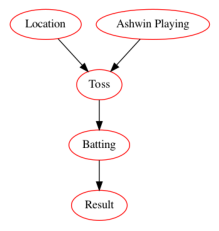

In [12]:
#Solution for part 3 
from pomegranate import DiscreteDistribution, ConditionalProbabilityTable, State, BayesianNetwork
from matplotlib import pyplot
import pygraphviz

location = DiscreteDistribution(prior_probability(list(mapping_dict['Location'].values())))        # location is independent
ashwin_playing = DiscreteDistribution(prior_probability(list(mapping_dict['Ashwin Playing'].values())))          # ashwin playing or not

p1 = posterior_probability([['Location', 'Ashwin Playing'], ['Toss']])
toss = ConditionalProbabilityTable(p1, [location, ashwin_playing])            # winning/losing toss is independent

p2 = posterior_probability([['Toss'], ['Batting']])
batting = ConditionalProbabilityTable(p2, [toss])          # batting first or second can be considered independent

p3 = posterior_probability([['Batting'], ['Result']])
result = ConditionalProbabilityTable(p3, [batting])          # batting first or second can be considered independent
print(toss)
print(batting)
print(result)

# A favorable outcome would decide whether or not Ashwin should play

s1 = State(location, name="Location")
s2 = State(ashwin_playing, name="Ashwin Playing")
s3 = State(toss, name="Toss")
s4 = State(batting, name="Batting")

s5 = State(result, name="Result")

model = BayesianNetwork("Assignment 2 - Spinning the Bayes Net")
model.add_states(s1, s2, s3, s4, s5)

model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.add_edge(s3, s4)
model.add_edge(s4, s5)
model.plot()

model.bake()

In [13]:
#Solution for part 4
# a)
beliefs = map( str, model.predict_proba([{'Result': 'won', 'Batting': 'bat_2nd', 'Ashwin Playing': 'Y', }]) )
print("\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( model.states, beliefs ) ))

# conclusion :
# Probability of India winning, while batting 2nd and Ashwin playing 
# is 67% on home locations, 33% in away locations.
# 94.5% when losing toss, 5.5% when winning toss.

Location		[{
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "home" : 0.57776238309664,
             "away" : 0.42223761690336004
         }
     ],
     "frozen" : false
 }                                        'Y'
 {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "toss_lost" : 0.8971250432975405,
             "toss_won" : 0.1028749567024595
         }
     ],
     "frozen" : false
 }                                             'bat_2nd' 'won']


In [18]:
#Solution for part 4
# b)

beliefs = map( str, model.predict_proba([{'Result': 'won', 'Batting': 'bat_2nd', 'Ashwin Playing': 'N', }]) )
print("\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( model.states, beliefs ) ))

# conclusion :
# Probability of India winning, while batting 2nd and Ashwin NOT playing 
# is 0% on home locations, 100% in away locations.
# 69% when losing toss, 31% when winning toss.

Batting		['bat_2nd' {
               "class" : "Distribution",
               "dtype" : "str",
               "name" : "DiscreteDistribution",
               "parameters" : [
                   {
                       "toss_won" : 0.47058823529411764,
                       "toss_lost" : 0.5294117647058824
                   }
               ],
               "frozen" : false
           }
 {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "home" : 0.5058823529411764,
             "away" : 0.49411764705882355
         }
     ],
     "frozen" : false
 }                                        'N' 'won']


In [19]:
#Solution for part 4
# c)

beliefs = map( str, model.predict_proba([{'Result': 'lost', 'Batting': 'bat_2nd', 'Ashwin Playing': 'Y', }]) )
print("\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( model.states, beliefs ) ))

# conclusion :
# Probability of India losing, while batting 2nd and Ashwin playing 
# is 67% on home locations, 33% in away locations.
# 94.5% when losing toss, 5.5% when winning toss.

Batting		['bat_2nd' {
               "class" : "Distribution",
               "dtype" : "str",
               "name" : "DiscreteDistribution",
               "parameters" : [
                   {
                       "toss_won" : 0.0,
                       "toss_lost" : 1.0
                   }
               ],
               "frozen" : false
           }
 {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "home" : 0.6142857142857143,
             "away" : 0.3857142857142858
         }
     ],
     "frozen" : false
 }                                        'Y' 'lost']


In [20]:
#Solution for part 4
# d)

beliefs = map( str, model.predict_proba([{'Result': 'lost', 'Batting': 'bat_2nd', 'Ashwin Playing': 'N', }]) )
print("\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( model.states, beliefs ) ))

# conclusion :
# Probability of India losing, while batting 2nd and Ashwin NOT playing 
# is 0% on home locations, 100% in away locations.
# 69% when losing toss, 31% when winning toss.

Batting		['bat_2nd' {
               "class" : "Distribution",
               "dtype" : "str",
               "name" : "DiscreteDistribution",
               "parameters" : [
                   {
                       "toss_won" : 0.1818181818181819,
                       "toss_lost" : 0.818181818181818
                   }
               ],
               "frozen" : false
           }
 {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "home" : 0.0,
             "away" : 1.0
         }
     ],
     "frozen" : false
 }                                    'N' 'lost']


<h3><center> Happy Coding!</center></h3>